In [4]:
using JLD2

In [5]:
using ComputationalHeatTransfer
using LaTeXStrings
using Revise
using LinearAlgebra
using DifferentialEquations
using Interpolations
using JLD2
using Plots
gr()  

cd(dirname(pwd()))
cd("src") 
includet("OneDOHP.jl")
using ..OneDOHP

┌ Warning: Error requiring `StaticArrays` from `ArrayInterface`
│   exception = (ErrorException("too many parameters for type"), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x0000000068f84117, Ptr{Nothing} @0x0000000068ff06a9, Ptr{Nothing} @0x000000006901236c, Ptr{Nothing} @0x0000000069012031, Ptr{Nothing} @0x0000000069012b40, Ptr{Nothing} @0x0000000069013515, Base.InterpreterIP in top-level CodeInfo for ArrayInterface at statement 82, Ptr{Nothing} @0x0000000069030c9d, Ptr{Nothing} @0x000000006903241a, Ptr{Nothing} @0x000000004b24e2ff, Ptr{Nothing} @0x000000004b24e323, Ptr{Nothing} @0x000000001a2604e1, Ptr{Nothing} @0x000000004b24e24a, Ptr{Nothing} @0x000000004b24e273, Ptr{Nothing} @0x000000001a25fdb8, Ptr{Nothing} @0x000000004b24e1b1, Ptr{Nothing} @0x000000004b24e1e3, Ptr{Nothing} @0x000000001a20c6fe, Ptr{Nothing} @0x000000001a264dc4, Ptr{Nothing} @0x000000001a2650e3, Ptr{Nothing} @0x0000000069030130, Ptr{Nothing} @0x0000000069026590, Ptr{Nothing} @0x000000001a188157, Ptr{No

In [20]:
fluid_type = "butane"
Tᵥ = 291.0

291.0

In [21]:
Cpₗ = CoolProp.PropsSI("CPMASS","T",Tᵥ,"Q",0.0,fluid_type)
ρₗ  = CoolProp.PropsSI("D","T",Tᵥ,"Q",0.0,fluid_type)
μₗ  = CoolProp.PropsSI("V","T",Tᵥ,"Q",0.0,fluid_type)
hₗ = CoolProp.PropsSI("H","T",Tᵥ,"Q",0.0,fluid_type)
kₗ = CoolProp.PropsSI("CONDUCTIVITY","T",Tᵥ,"Q",0.0,fluid_type)
Prₗ = CoolProp.PropsSI("PRANDTL","T",Tᵥ,"Q",0.0,fluid_type)

Cpᵥ = CoolProp.PropsSI("CPMASS","T",Tᵥ,"Q",1.0,fluid_type)
ρᵥ  = CoolProp.PropsSI("D","T",Tᵥ,"Q",1.0,fluid_type)
μᵥ  = CoolProp.PropsSI("V","T",Tᵥ,"Q",1.0,fluid_type);
hᵥ = CoolProp.PropsSI("H","T",Tᵥ,"Q",1.0,fluid_type)
kᵥ = CoolProp.PropsSI("CONDUCTIVITY","T",Tᵥ,"Q",1.0,fluid_type)
Prᵥ = CoolProp.PropsSI("PRANDTL","T",Tᵥ,"Q",1.0,fluid_type)

σ = CoolProp.PropsSI("I","T",Tᵥ,"Q",0.0,fluid_type)
P = CoolProp.PropsSI("P","T",Tᵥ,"Q",0.0,fluid_type)
R = CoolProp.PropsSI("GAS_CONSTANT","T",Tᵥ,"Q",1.0,fluid_type)
M = CoolProp.PropsSI("M","T",Tᵥ,"Q",1.0,fluid_type)
Rkg = R/M

αₗ = kₗ/ρₗ/Cpₗ
νₗ = μₗ/ρₗ
νᵥ = μᵥ/ρᵥ;
hₗᵥ = hᵥ-hₗ;

In [54]:
plate_hist, integrator_plate = load("plate_conserve_DT1.0_H2250_Film1.0.jld2", "plate_hist",  "integrator_plate")
sys = integrator_plate.p

Unbounded Heat conduction system on a grid of size 250 x 108 and 0 static immersed points


In [55]:
tube_hist, integrator_tube = load("tube_conserve_DT1.0_H2250_Film1.0.jld2", "tube_hist",  "integrator_tube")

sysfinal = []
for i = 1:length(tube_hist)
    push!(sysfinal, deepcopy(getcurrentsys(tube_hist[i].u,tube_hist[i].p)))
end

┌ Info: Saved animation to 
│   fn = C:\Users\liyux\Documents\GitHub\ComputationalHeatTransfer.jl\src\tmp.gif
└ @ Plots C:\Users\liyux\.julia\packages\Plots\LSKOd\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\liyux\\Documents\\GitHub\\ComputationalHeatTransfer.jl\\src\\tmp.gif")
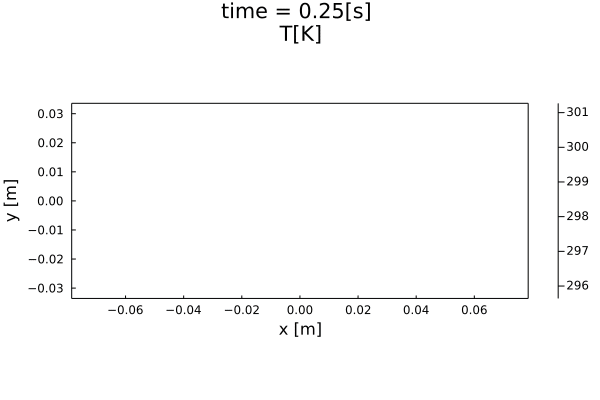

In [62]:
Tmax = maximum(temperature(plate_hist[end-1])[:])
Tmin = minimum(temperature(plate_hist[end-1])[:])
@gif for i = 1:1:length(plate_hist)
plot(temperature(plate_hist[i]),sys.grid,legend=true,color=cgrad(:RdBu,rev=true),clim=(Tmin,Tmax),line_z=0,xlabel="x [m]",ylabel="y [m]",title=string("time = ", round(plate_hist[i].t, digits=2), "[s] \n",  "T[K]"))
end



In [ ]:
savefig("temperature.svg")

┌ Info: Saved animation to 
│   fn = C:\Users\liyux\Documents\GitHub\ComputationalHeatTransfer.jl\src\tmp.gif
└ @ Plots C:\Users\liyux\.julia\packages\Plots\LSKOd\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\liyux\\Documents\\GitHub\\ComputationalHeatTransfer.jl\\src\\tmp.gif")
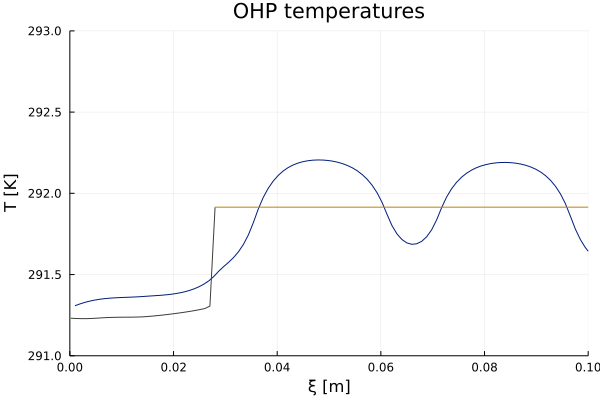

In [67]:
@gif for ii=1:length(sysfinal)
#     plot(sysfinal[ii],plottype="T",ylim=(Tmin,Tmax),xlabel="ξ [m]",ylabel="T [K]",xlim=(0.0,0.5))
    plot(sysfinal[ii],plottype="T",ylim=(291.0,293.0),xlabel="ξ [m]",ylabel="T [K]",xlim=(0.0,0.1))
end
# savefig("tubetemp.svg")

In [ ]:
# @gif for ii=1:length(sysfinal)
#     plot(sysfinal[ii],plottype="ΔT",ylim=(-4.0,1.0))
#     plot!([0.0,sysfinal[ii].tube.L],[sysfinal[1].wall.ΔTthres,sysfinal[1].wall.ΔTthres],label="boiling threshold")
# end

┌ Info: Saved animation to 
│   fn = C:\Users\liyux\Documents\GitHub\ComputationalHeatTransfer.jl\src\tmp.gif
└ @ Plots C:\Users\liyux\.julia\packages\Plots\LSKOd\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\liyux\\Documents\\GitHub\\ComputationalHeatTransfer.jl\\src\\tmp.gif")
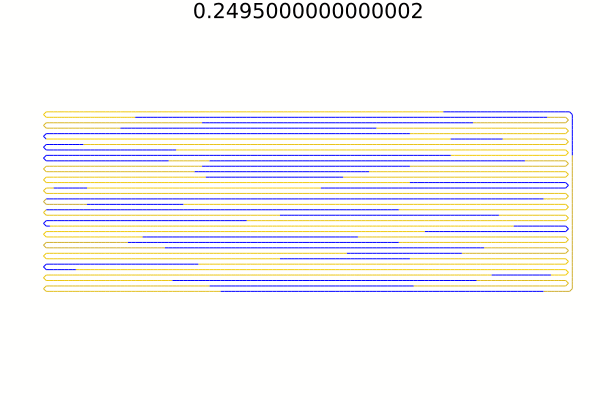

In [64]:
@gif for i=1:1:length(sysfinal)
    Htmp = sys_to_Harray(sysfinal[i])
    plot(sys.qline[1].body,fillalpha=0,linecolor=cgrad([:gold, :blue],rev=true),line_z=Htmp,title=tube_hist[i].t,xlabel="x ",ylabel="y ",border=:none,axis=nothing)
end

In [ ]:
savefig("OHPslugs.svg")

In [ ]:
# @gif for ii=1:length(sysfinal)
#     plot(sysfinal[ii],plottype="P")
# end

In [ ]:
# plot(sys.qline[1].arccoord,sys_to_heatflux(sysfinal[end]))

## get and save tempeature line graph

In [56]:
inch = 2.54e-2;

x = [-3.0inch,0.0]
y = [0.0,0.0]

X =  VectorData(x,y);

In [57]:
H = Regularize(X,cellsize(sys),I0=origin(sys.grid))
g = ScalarData(X);

In [58]:
ghist = []

size(g)
for j = 1:length(g)
    gtemp = []
    for i = 1:length(plate_hist)
        H(g,temperature(plate_hist[i]))
        append!(gtemp,deepcopy(g[j]))
    end
    push!(ghist,deepcopy(gtemp))
end

thist = []
    for i = 1:length(plate_hist)
        append!(thist,plate_hist[i].t)
    end

In [59]:
# save("RTD.jld2","RTDx",RTDx,"RTD1",RTD1,"RTD4",RTD4)

In [60]:
RTDx,RTD1,RTD4 = load("RTD.jld2","RTDx","RTD1","RTD4")

(0:53, [291.2, 291.2, 291.6, 291.8, 292.1, 292.5, 292.7, 293.1, 293.1, 293.6  …  295.8, 295.7, 295.7, 295.9, 295.9, 295.9, 296.1, 295.7, 295.9, 295.9], [291.2, 292.7, 294.0, 295.0, 295.6, 296.3, 296.8, 297.3, 297.7, 298.1  …  301.2, 301.3, 301.4, 301.4, 301.4, 301.5, 301.4, 301.7, 301.6, 301.6])

In [65]:
save("Conserve_H2250_D1_TH1.jld","thist",thist,"ghist",ghist)

## Plot temperature curves

In [29]:
thist_D_5_TH_10,ghist_D_5_TH_10 = load("D_5_TH_10.jld","thist","ghist");

In [30]:
thist_D_03_TH_1,ghist_D_03_TH_1 = load("D_0.3_TH_1.jld","thist","ghist");

In [31]:
thist_D_1_TH_1,ghist_D_1_TH_1 = load("D_1_TH_1.jld","thist","ghist");

In [32]:
thist_D_03_TH_5,ghist_D_03_TH_5 = load("D_0.3_TH_5.jld","thist","ghist");

In [33]:
thist_D_1_TH_1_fixed,ghist_D_1_TH_1_fixed = load("D_1.0_TH_1_fixed.jld","thist","ghist");

In [34]:
thist_D_03_TH_1_fixed,ghist_D_03_TH_1_fixed = load("D_0.3_TH_1_fixed.jld","thist","ghist");

In [35]:
thist_D_10_TH_1_plate_1_h_2250,ghist_D_10_TH_1_plate_1_h_2250 = load("D_1.0_TH_1_plate_1_h_2250.jld","thist","ghist");

In [36]:
thist_D_10_TH_1_plate_15_h_2250,ghist_D_10_TH_1_plate_15_h_2250 = load("D_1.0_TH_1_plate_15_h_2250.jld","thist","ghist");

In [37]:
thist_D_10_TH_1_plate_15_h_2625,ghist_D_10_TH_1_plate_15_h_2625 = load("D_1.0_TH_1_plate_15_h_2625.jld","thist","ghist");

In [38]:
thist_D_10_TH_1_plate_2_h_2250,ghist_D_10_TH_1_plate_2_h_2250 = load("D_1.0_TH_1_plate_2_h_2250.jld","thist","ghist");

In [39]:
thist_H2250_TH15_DirichletBC,ghist_H2250_TH15_DirichletBC = load("plate_H2250_TH15_DirichletBC.jld","thist","ghist");

In [40]:
thist_H2250_TH15_AdiabaticBC,ghist_H2250_TH15_AdiabaticBC = load("H2250_TH1.5_AdiabaticBC.jld","thist","ghist");

In [66]:
thist_Conserve_H2250_D1_TH1,ghist_Conserve_H2250_D1_TH1 = load("Conserve_H2250_D1_TH1.jld","thist","ghist");

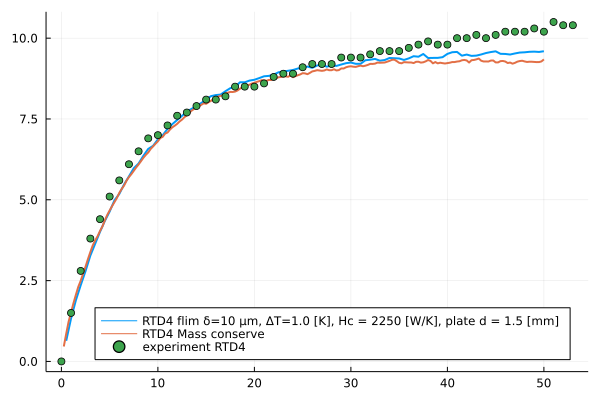

In [71]:
# i = 1 #RTD1
i = 2 #RTD4

# plot(thist_D_5_TH_10,ghist_D_5_TH_10[i] .- Tᵥ,label="flim δ/D=0.1, ΔT=10 [K]")
# plot!(thist_D_03_TH_1,ghist_D_03_TH_1[i] .- Tᵥ,label="(incorrect dynamics) flim δ=10 μm, ΔT=0.3 [K]",linewidth=2)
# plot!(thist_D_1_TH_1,ghist_D_1_TH_1[i] .- 295.0,label="(incorrect dynamics) flim δ=10 μm, ΔT=1 [K]",linewidth=2)
# plot!(thist_D_03_TH_5,ghist_D_03_TH_5[i] .-Tᵥ,label="flim δ/D=0.05, ΔT=0.3 [K]")
# plot!(thist_D_1_TH_1_fixed,ghist_D_1_TH_1_fixed[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K]",linewidth=2)
# plot(thist_D_03_TH_1_fixed,ghist_D_03_TH_1_fixed[i] .-Tᵥ,label="flim δ=10 μm, ΔT=0.3 [K], Hc = 1500 [W/K], plate d = 2 [mm]",linewidth=2, ylabel="")
# plot!(thist_D_10_TH_1_plate_1_h_2250,ghist_D_10_TH_1_plate_1_h_2250[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K], Hc = 2250 [W/K], plate d = 1 [mm]",linewidth=2)
plot(thist_D_10_TH_1_plate_15_h_2250,ghist_D_10_TH_1_plate_15_h_2250[i] .-Tᵥ,label="RTD4 flim δ=10 μm, ΔT=1.0 [K], Hc = 2250 [W/K], plate d = 1.5 [mm]",linewidth=2)
plot!(thist_Conserve_H2250_D1_TH1,ghist_Conserve_H2250_D1_TH1[i] .-Tᵥ,label="RTD4 Mass conserve",linewidth=2)
# plot!(thist_D_10_TH_1_plate_2_h_2250,ghist_D_10_TH_1_plate_2_h_2250[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K], Hc = 2250 [W/K], plate d = 2 [mm]",linewidth=2)
# plot!(thist_D_10_TH_1_plate_15_h_2625,ghist_D_10_TH_1_plate_15_h_2625[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K], Hc = 2625 [W/K], plate d = 1.5 [mm]",linewidth=2)
# plot!(thist_H2250_TH15_DirichletBC,ghist_H2250_TH15_DirichletBC[i] .-Tᵥ,label="DirichletBC",linewidth=2)
# plot!(thist_H2250_TH15_AdiabaticBC,ghist_H2250_TH15_AdiabaticBC[i] .-Tᵥ,label="AdiabaticBC",linewidth=2)
scatter!(RTDx .- RTDx[1],RTD4 .- RTD4[1], label="experiment RTD4",legend=:bottomright)
# savefig("RTD4.svg")

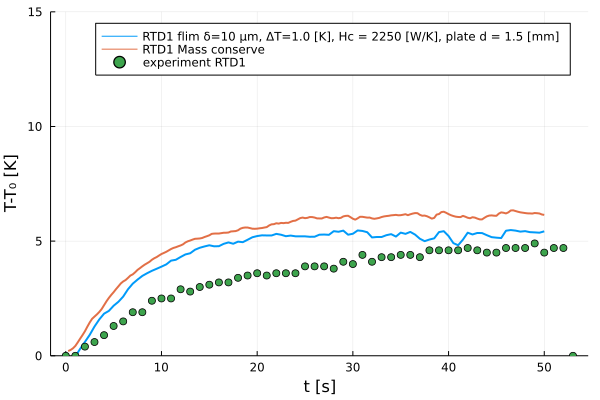

In [72]:
i = 1 #RTD1
# i = 2 #RTD4

# plot(thist_D_5_TH_10,ghist_D_5_TH_10[i] .- Tᵥ,label="flim δ=100 μm, ΔT=10 [K]")
# plot(thist_D_03_TH_1,ghist_D_03_TH_1[i] .- Tᵥ,label="(incorrect dynamics) flim δ=10 μm, ΔT=0.3 [K]",linewidth=2)
# plot!(thist_D_1_TH_1,ghist_D_1_TH_1[i] .- Tᵥ,label="(incorrect dynamics) flim δ=10 μm, ΔT=1 [K]",linewidth=2)
# plot!(thist_D_03_TH_5,ghist_D_03_TH_5[i] .-Tᵥ,label="flim δ=50 μm, ΔT=0.3 [K]")
# plot!(thist_D_1_TH_1_fixed,ghist_D_1_TH_1_fixed[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K]",linewidth=2)
# plot(thist_D_03_TH_1_fixed,ghist_D_03_TH_1_fixed[i] .-Tᵥ,label="flim δ=10 μm, ΔT=0.3 [K], Hc = 1500 [W/K], plate d = 2 [mm]",linewidth=2)
# plot!(thist_D_10_TH_1_plate_1_h_2250,ghist_D_10_TH_1_plate_1_h_2250[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K], Hc = 2250 [W/K], plate d = 1 [mm]",linewidth=2)
plot(thist_D_10_TH_1_plate_15_h_2250,ghist_D_10_TH_1_plate_15_h_2250[i] .-Tᵥ,label="RTD1 flim δ=10 μm, ΔT=1.0 [K], Hc = 2250 [W/K], plate d = 1.5 [mm]",linewidth=2)
plot!(thist_Conserve_H2250_D1_TH1,ghist_Conserve_H2250_D1_TH1[i] .-Tᵥ,label="RTD1 Mass conserve",linewidth=2)
# plot!(thist_D_10_TH_1_plate_2_h_2250,ghist_D_10_TH_1_plate_2_h_2250[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K], Hc = 2250 [W/K], plate d = 2 [mm]",linewidth=2)
# plot!(thist_D_10_TH_1_plate_15_h_2625,ghist_D_10_TH_1_plate_15_h_2625[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K], Hc = 2625 [W/K], plate d = 1.5 [mm]",linewidth=2)
# plot!(thist_H2250_TH15_DirichletBC,ghist_H2250_TH15_DirichletBC[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K]",linewidth=2)
# plot!(thist_H2250_TH15_AdiabaticBC,ghist_H2250_TH15_AdiabaticBC[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K]",linewidth=2)
scatter!(RTDx .- RTDx[1],RTD1 .- RTD1[1], label="experiment RTD1",legend=:topright,ylim=(0.0,15.0),xlabel="t [s]",ylabel="T-T₀ [K]")
# savefig("RTD1.svg")

In [ ]:
sysfinal[end].vapor.δ[1]

In [ ]:
sysfinal[end].wall.ΔTthres

## OHP animation

In [ ]:
ρ = 2700;
c = 8.97e02;
k = 1.67e02;
d = 2e-3;
params = HeatConductionParameters(ρ,c,k,thickness=d)

In [ ]:
Δx = cellsize(sys)
ds = 1.5Δx
nturn = 16
#pitch = 0.125
length_ohp = 44.25*1e-3
height = 133.83*1e-3
gap = d
pitch = length_ohp/(2*nturn+1)
x0, y0 = height/2, length_ohp/2
x, y, xf, yf = ComputationalHeatTransfer.construct_ohp_curve(nturn,pitch,height,gap,ds,x0,y0,false,false,3pi/2)
ohp = BasicBody(x,y)

In [ ]:
sys.points

In [ ]:
@gif for i=1:1:length(sysfinal)
    Htmp = sys_to_Harray(sysfinal[i])
    plot(ohp,fillalpha=0,linecolor=cgrad([:gold, :blue],rev=true),line_z=Htmp,xlabel="x ",ylabel="y ",border=:none,axis=nothing,title=string("time = ", round(plate_hist[i].t, digits=2), "[s] \n",  "T[K]"))
end

## OHP film thickness correlation

In [ ]:
integrator_tube.p.vapor.δ

In [ ]:

velocity_avg = zeros(length(sysfinal))
velocity_max = zeros(length(sysfinal))

for i = 1:length(sysfinal)
    tmp = 0
    for j = length(sysfinal[i].liquid.dXdt)
        tmp += abs(sysfinal[i].liquid.dXdt[j][1])
    
        velocity_avg[i] = tmp/j
    end
    
    velocity_max[i] = maximum(abs.(sysfinal[i].liquid.dXdt[:][1]))
end



In [ ]:
μₗ

In [ ]:
Ca = a .* μₗ ./σ

In [ ]:
plot(thist,velocity_avg,label="v avg")
plot!(thist,velocity_max,label="v max",xlabel="t [s]", ylabel="v [m/s]")

In [ ]:
d_tube = sysfinal[end].tube.d

### Range of Re
### $Re = \frac{\rho_{\mathrm{l}} v d}{\mu_{\mathrm{l}}}$



In [ ]:
Re_avg = d_tube*ρₗ .* velocity_avg / μₗ
Re_max = d_tube*ρₗ .* velocity_max / μₗ;

In [ ]:
plot(thist,Re_avg,label="v avg")
plot!(thist,Re_max,label="v max",xlabel="t [s]", ylabel="Re")

In [ ]:
integrator_tube.p.vapor.δ

In [ ]:
δ_corr = integrator_tube.p.tube.d * (0.67 .* Ca.^(2/3)) ./ ( 1 .+ 3.35 .* Ca.^(2/3))

In [ ]:
δ_corr = integrator_tube.p.tube.d * (0.67 .* Ca2.^(2/3)) ./ ( 1 .+ 3.35 .* Ca2.^(2/3))

In [ ]:
U = 0.4 #m/s

Ca2 = U .* μₗ ./σ

In [ ]:
tube_d = 1e-3

In [ ]:
Ca_star1 = (μₗ^2/(σ * ρₗ * tube_d/2))^(3/4)

In [ ]:
Ca_star2 = (μₗ^2/(σ * ρₗ * tube_d/2))^(1/2)

In [ ]:
sysfinal[1].wall.ΔTthres

In [ ]:
sysfinal[1].vapor.δ

# Temperature curves (constant dipositing film thickness)

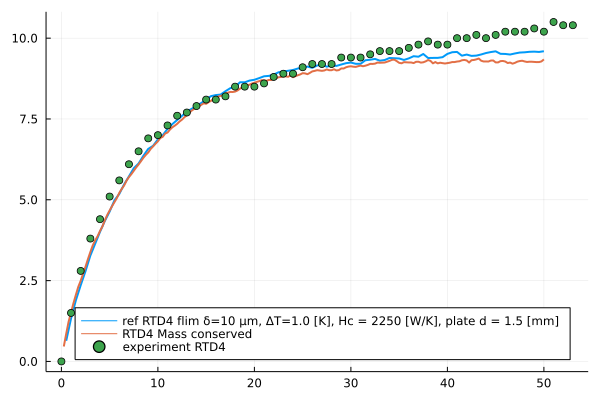

In [78]:
# i = 1 #RTD1
i = 2 #RTD4

# plot(thist_D_5_TH_10,ghist_D_5_TH_10[i] .- Tᵥ,label="flim δ/D=0.1, ΔT=10 [K]")
# plot!(thist_D_03_TH_1,ghist_D_03_TH_1[i] .- Tᵥ,label="(incorrect dynamics) flim δ=10 μm, ΔT=0.3 [K]",linewidth=2)
# plot!(thist_D_1_TH_1,ghist_D_1_TH_1[i] .- 295.0,label="(incorrect dynamics) flim δ=10 μm, ΔT=1 [K]",linewidth=2)
# plot!(thist_D_03_TH_5,ghist_D_03_TH_5[i] .-Tᵥ,label="flim δ/D=0.05, ΔT=0.3 [K]")
# plot!(thist_D_1_TH_1_fixed,ghist_D_1_TH_1_fixed[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K]",linewidth=2)
# plot(thist_D_03_TH_1_fixed,ghist_D_03_TH_1_fixed[i] .-Tᵥ,label="flim δ=10 μm, ΔT=0.3 [K], Hc = 1500 [W/K], plate d = 2 [mm]",linewidth=2, ylabel="")
# plot!(thist_D_10_TH_1_plate_1_h_2250,ghist_D_10_TH_1_plate_1_h_2250[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K], Hc = 2250 [W/K], plate d = 1 [mm]",linewidth=2)
plot(thist_D_10_TH_1_plate_15_h_2250,ghist_D_10_TH_1_plate_15_h_2250[i] .-Tᵥ,label="ref RTD4 flim δ=10 μm, ΔT=1.0 [K], Hc = 2250 [W/K], plate d = 1.5 [mm]",linewidth=2)
plot!(thist_Conserve_H2250_D1_TH1,ghist_Conserve_H2250_D1_TH1[i] .-Tᵥ,label="RTD4 Mass conserved",linewidth=2)
# plot!(thist_D_10_TH_1_plate_2_h_2250,ghist_D_10_TH_1_plate_2_h_2250[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K], Hc = 2250 [W/K], plate d = 2 [mm]",linewidth=2)
# plot!(thist_D_10_TH_1_plate_15_h_2625,ghist_D_10_TH_1_plate_15_h_2625[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K], Hc = 2625 [W/K], plate d = 1.5 [mm]",linewidth=2)
# plot!(thist_H2250_TH15_DirichletBC,ghist_H2250_TH15_DirichletBC[i] .-Tᵥ,label="DirichletBC",linewidth=2)
# plot!(thist_H2250_TH15_AdiabaticBC,ghist_H2250_TH15_AdiabaticBC[i] .-Tᵥ,label="AdiabaticBC",linewidth=2)
scatter!(RTDx .- RTDx[1],RTD4 .- RTD4[1], label="experiment RTD4",legend=:bottomright)
# savefig("RTD4.svg")

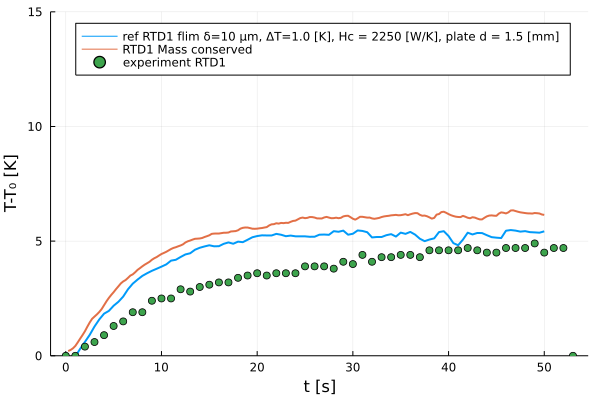

In [84]:
i = 1 #RTD1
# i = 2 #RTD4

# plot(thist_D_5_TH_10,ghist_D_5_TH_10[i] .- Tᵥ,label="flim δ=100 μm, ΔT=10 [K]")
# plot(thist_D_03_TH_1,ghist_D_03_TH_1[i] .- Tᵥ,label="(incorrect dynamics) flim δ=10 μm, ΔT=0.3 [K]",linewidth=2)
# plot!(thist_D_1_TH_1,ghist_D_1_TH_1[i] .- Tᵥ,label="(incorrect dynamics) flim δ=10 μm, ΔT=1 [K]",linewidth=2)
# plot!(thist_D_03_TH_5,ghist_D_03_TH_5[i] .-Tᵥ,label="flim δ=50 μm, ΔT=0.3 [K]")
# plot!(thist_D_1_TH_1_fixed,ghist_D_1_TH_1_fixed[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K]",linewidth=2)
# plot(thist_D_03_TH_1_fixed,ghist_D_03_TH_1_fixed[i] .-Tᵥ,label="flim δ=10 μm, ΔT=0.3 [K], Hc = 1500 [W/K], plate d = 2 [mm]",linewidth=2)
# plot!(thist_D_10_TH_1_plate_1_h_2250,ghist_D_10_TH_1_plate_1_h_2250[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K], Hc = 2250 [W/K], plate d = 1 [mm]",linewidth=2)
plot(thist_D_10_TH_1_plate_15_h_2250,ghist_D_10_TH_1_plate_15_h_2250[i] .-Tᵥ,label="ref RTD1 flim δ=10 μm, ΔT=1.0 [K], Hc = 2250 [W/K], plate d = 1.5 [mm]",linewidth=2)
plot!(thist_Conserve_H2250_D1_TH1,ghist_Conserve_H2250_D1_TH1[i] .-Tᵥ,label="RTD1 Mass conserved",linewidth=2)
# plot!(thist_D_10_TH_1_plate_2_h_2250,ghist_D_10_TH_1_plate_2_h_2250[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K], Hc = 2250 [W/K], plate d = 2 [mm]",linewidth=2)
# plot!(thist_D_10_TH_1_plate_15_h_2625,ghist_D_10_TH_1_plate_15_h_2625[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K], Hc = 2625 [W/K], plate d = 1.5 [mm]",linewidth=2)
# plot!(thist_H2250_TH15_DirichletBC,ghist_H2250_TH15_DirichletBC[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K]",linewidth=2)
# plot!(thist_H2250_TH15_AdiabaticBC,ghist_H2250_TH15_AdiabaticBC[i] .-Tᵥ,label="flim δ=10 μm, ΔT=1.0 [K]",linewidth=2)
scatter!(RTDx .- RTDx[1],RTD1 .- RTD1[1], label="experiment RTD1",legend=:topright,ylim=(0.0,15.0),xlabel="t [s]",ylabel="T-T₀ [K]")
# savefig("RTD1.svg")

## Film thickness graphs

┌ Info: Saved animation to 
│   fn = C:\Users\liyux\Documents\GitHub\ComputationalHeatTransfer.jl\src\tmp.gif
└ @ Plots C:\Users\liyux\.julia\packages\Plots\LSKOd\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\liyux\\Documents\\GitHub\\ComputationalHeatTransfer.jl\\src\\tmp.gif")
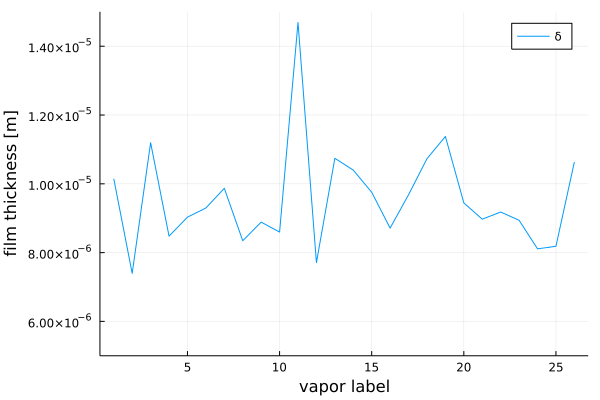

In [86]:
@gif for i=length(sysfinal):length(sysfinal)
    plot(sysfinal[i].vapor.δ,xlabel="vapor label",ylabel="film thickness [m]", label = "δ",ylim=(5e-6,1.5e-5))
end

## Mass conservation graphs